## TITANIC DATASET

In [21]:
! cd data ; wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2020-06-10 21:22:58--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K   256KB/s    in 0.2s    

2020-06-10 21:22:59 (256 KB/s) - ‘titanic.csv’ saved [44225/44225]



-------

### Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from seaborn import heatmap

In [2]:
titanic = pd.read_csv('data/titanic.csv', sep=',')

### First EDA

In [3]:
print('N. osservazioni: %d' % (titanic.shape[0], ))
print('N. features: %d' % (titanic.shape[1], ))

N. osservazioni: 887
N. features: 8


In [4]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [6]:
titanic.columns = ['survived', 'class', 'name', 'sex', 'age', 'siblings', 'parents', 'fare']

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  887 non-null    int64  
 1   class     887 non-null    int64  
 2   name      887 non-null    object 
 3   sex       887 non-null    object 
 4   age       887 non-null    float64
 5   siblings  887 non-null    int64  
 6   parents   887 non-null    int64  
 7   fare      887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [8]:
titanic.isnull().sum(axis = 0)

survived    0
class       0
name        0
sex         0
age         0
siblings    0
parents     0
fare        0
dtype: int64

Distribuszione della variabile target: 0 - Morto / 1 - Sopravvissuto
-----
0    545
1    342
Name: survived, dtype: int64
-----


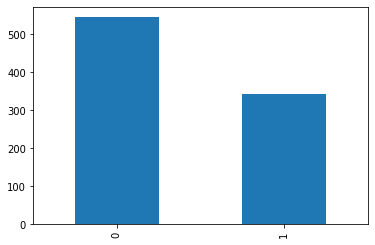

In [9]:
print('Distribuszione della variabile target: 0 - Morto / 1 - Sopravvissuto')
print('-----')
print(titanic['survived'].value_counts())
print('-----')
(titanic['survived'].value_counts()).plot.bar()

In [10]:
print('Rimuovo le colonne non utili: Name')
titanic = titanic.drop('name', axis=1)
titanic.head()

Rimuovo le colonne non utili: Name


,survived,class,sex,age,siblings,parents,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
print('Rimappo class per renderla categorica')
titanic = titanic.replace({'class':{1: '_1', 2: '_2', 3: '_3'}})

Rimappo class per renderla categorica


In [12]:
print('Trasformo in dummy le variabili categoriche: sex, class')
titanic = pd.get_dummies(titanic)
titanic.head()

Trasformo in dummy le variabili categoriche: sex, class


,survived,age,siblings,parents,fare,class__1,class__2,class__3,sex_female,sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1


In [13]:
print('Rimuovo le colonne per evitare collinearità: sex_female, class__1')
titanic = titanic.drop(['sex_female', 'class__1'], axis=1)
titanic.head()

Rimuovo le colonne per evitare collinearità: sex_female, class__1


,survived,age,siblings,parents,fare,class__2,class__3,sex_male
0,0,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,0,1,1


In [15]:
y = titanic.survived
X = titanic.drop('survived', axis = 1)

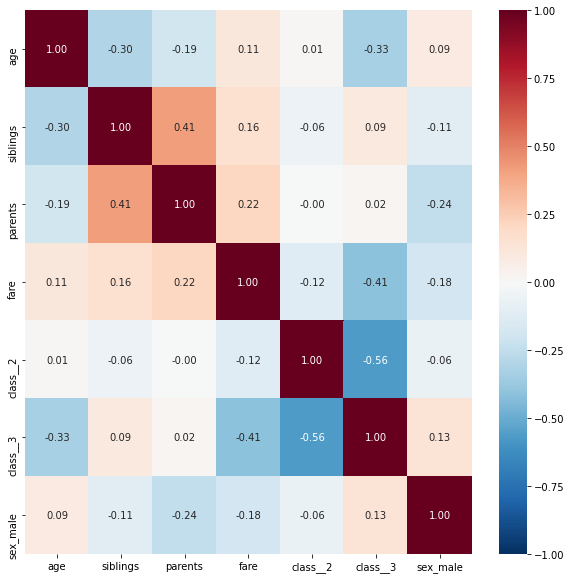

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = heatmap(
    X.corr(), 
    fmt = '.2f', 
    annot = True, 
    ax = ax, 
    cmap = 'RdBu_r',
    vmin = -1, 
    vmax = 1)